# Medidas de distância

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import DistanceMetric as dm
from sklearn import metrics
import textdistance

In [83]:
X = np.array([ [0,1], [1,2], [0,6]  ])

In [84]:
X

array([[0, 1],
       [1, 2],
       [0, 6]])

## Exibindo os pontos

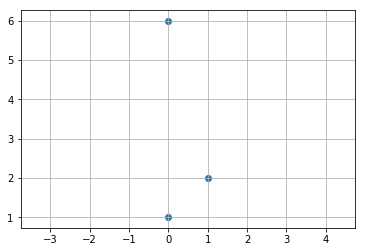

In [9]:
plt.scatter(X[:, 0], X[:, 1])
plt.axes().set_aspect('equal', 'datalim')
plt.grid()

## Metrics intended for real-valued vector spaces
| identifier | class name |	args | distance function |
|----|----|----|----|
| "euclidean" |	EuclideanDistance |	- | $ \sqrt{ \sum_{i=0}^{n-1} (x_i - y_i)^2}$ |
| "manhattan" | ManhattanDistance | - | $ \sum_{i=0}^{n-1} |x_i - y_i| $ |
| "chebyshev" |	ChebyshevDistance |	- | $ max(|x - y|) $ |
| "minkowski" | MinkowskiDistance |	p | $ sum(|x - y|^p)^{(1/p)} $ |

### Distância euclidiana

$$ \sqrt{ \sum_{i=0}^{n-1} (x_i - y_i)^2}$$

In [10]:
dist = dm.get_metric('euclidean')
dist.pairwise(X)

array([[0.        , 1.41421356, 5.        ],
       [1.41421356, 0.        , 4.12310563],
       [5.        , 4.12310563, 0.        ]])

In [11]:
dist = dm.get_metric('minkowski', p=2)
dist.pairwise(X)

array([[0.        , 1.41421356, 5.        ],
       [1.41421356, 0.        , 4.12310563],
       [5.        , 4.12310563, 0.        ]])

### Distância manhattan ou city block

In [12]:
dist = dm.get_metric('manhattan')
dist.pairwise(X)

array([[0., 2., 5.],
       [2., 0., 5.],
       [5., 5., 0.]])

In [13]:
dist = dm.get_metric('cityblock')
dist.pairwise(X)

array([[0., 2., 5.],
       [2., 0., 5.],
       [5., 5., 0.]])

In [14]:
dist = dm.get_metric('minkowski', p=1)
dist.pairwise(X)

array([[0., 2., 5.],
       [2., 0., 5.],
       [5., 5., 0.]])

### Distância chebyshev

In [15]:
dist = dm.get_metric('chebyshev')
dist.pairwise(X)

array([[0., 1., 5.],
       [1., 0., 4.],
       [5., 4., 0.]])

### Distância haversine

In [69]:
X_= np.array([ [-4.9552363, -39.031273], # [lat, long]
               [-4.979175, -39.0553987] ])

In [141]:
earth_radius = 6371   # km
dist = dm.get_metric('haversine')
X_radians = np.radians(X_)              # entrada transformada para radianos
dist_pairs = dist.pairwise(X_radians)   
dist_pairs * earth_radius * 1000        # saída em radianos transformada para metros

array([[   0.        , 3772.02806976],
       [3772.02806976,    0.        ]])

#### Implementação de harversine

In [142]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Vectorized haversine function.
    https://stackoverflow.com/questions/43577086/pandas-calculate-haversine-distance-within-each-group-of-rows
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians).
    All (lat, lon) coordinates must have numeric dtypes and be of equal length.
    Result in meters.
    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a)) * 1000  # result in meters (* 1000)

In [143]:
haversine(-4.9552363, -39.031273, -4.979175, -39.0553987)

3772.0280697634075

### Distância hamming

Computes the normalized Hamming distance, or the proportion of those vector elements between two n-vectors u and v which disagree.

In [206]:
X__ = np.array([
       [1,0,1,1],
       [1,0,1,0],
       [1,1,0,0]])

In [178]:
# N_unequal(x, y) / N_tot
dist = dm.get_metric('hamming')
dist.pairwise(X__)

array([[0.  , 0.25, 0.75],
       [0.25, 0.  , 0.5 ],
       [0.75, 0.5 , 0.  ]])

In [209]:
metrics.pairwise_distances(X__, metric='hamming')

array([[0.  , 0.25, 0.75],
       [0.25, 0.  , 0.5 ],
       [0.75, 0.5 , 0.  ]])

In [219]:
y =      ['joao', 'jose', 'maria', 'pedro', 'carla']
y_pred = ['joao', 'maria', 'jose', 'lucia', 'carla']

In [220]:
# The Hamming loss is the fraction of labels that are incorrectly predicted.
metrics.hamming_loss(y, y_pred)

0.6

#### Aplicando em textos

In [258]:
# https://github.com/orsinium/textdistance
# https://pypi.org/project/textdistance/

In [259]:
textdistance.hamming('test', 'text')

1

In [260]:
textdistance.hamming.distance('test', 'text')

1

In [261]:
textdistance.hamming.similarity('test', 'text')

3

In [262]:
textdistance.hamming.normalized_distance('test', 'text')

0.25

In [263]:
textdistance.hamming.normalized_similarity('test', 'text')

0.75

### Distância jaccard

Given two vectors, u and v, the Jaccard distance is the proportion of those elements u[i] and v[i] that disagree.

In [221]:
# NNEQ (number of non-equal dimensions) / NNZ (number of nonzero dimensions)
dist = dm.get_metric('jaccard')
dist.pairwise(X__)

array([[0.        , 0.33333333, 0.75      ],
       [0.33333333, 0.        , 0.66666667],
       [0.75      , 0.66666667, 0.        ]])

In [222]:
metrics.pairwise_distances(X__, metric='jaccard')

/Users/regis/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 0.33333333, 0.75      ],
       [0.33333333, 0.        , 0.66666667],
       [0.75      , 0.66666667, 0.        ]])

In [223]:
y =      ['joao', 'jose', 'maria', 'pedro', 'carla']
y_pred = ['joao', 'maria', 'jose', 'lucia', 'carla']

In [224]:
# the size of the intersection divided by the size of the union of two label sets (usar a ordem dos elementos)
metrics.jaccard_similarity_score(y, y_pred)

0.4

In [225]:
# não normalizado -> somente o 1o elemento está correto.
metrics.jaccard_similarity_score(y, y_pred, normalize=False)

2

#### Aplicando em textos

In [256]:
# https://github.com/orsinium/textdistance
# https://pypi.org/project/textdistance/

In [264]:
textdistance.jaccard('test', 'text')

0.6

In [265]:
textdistance.jaccard.distance('test', 'text')

0.4

In [266]:
textdistance.jaccard.similarity('test', 'text')

0.6

In [267]:
textdistance.jaccard.normalized_distance('test', 'text')

0.4

In [268]:
textdistance.jaccard.normalized_similarity('test', 'text')

0.6

### Jaro-Wrinkler

In [273]:
textdistance.jaro_winkler('test', 'text')

0.8666666666666667

### Levenshtein Distance

The distance value describes the minimal number of deletions, insertions, or substitutions that are required to transform one string (the source) into another (the target).

See: https://stackabuse.com/levenshtein-distance-and-text-similarity-in-python/

In [272]:
textdistance.levenshtein('test', 'text')

1